***Zomato Data Analysis Project***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read File**

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

*Convert the Data type of Column - rate*

In [5]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']= dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Q1 Type of Resturant**

In [7]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

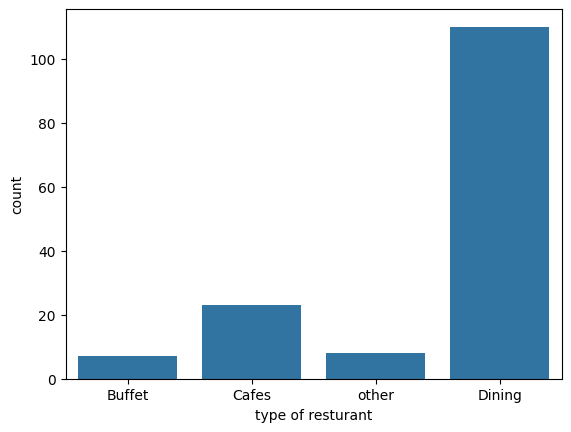

In [9]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

*Conclusion - Majority of the resturant falls in Dining Category*

**Q2 Votes from each type of resturant received from customer**

Text(0, 0.5, 'votes')

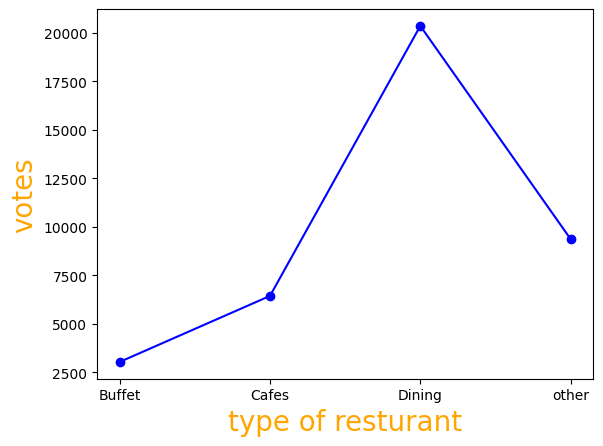

In [11]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("type of resturant", c="orange", size=20)
plt.ylabel("votes", c="orange", size=20)

*Conclusion - dinning resturant has received maximum votes*

**Q3 what the ratings that majority of resturants have received**

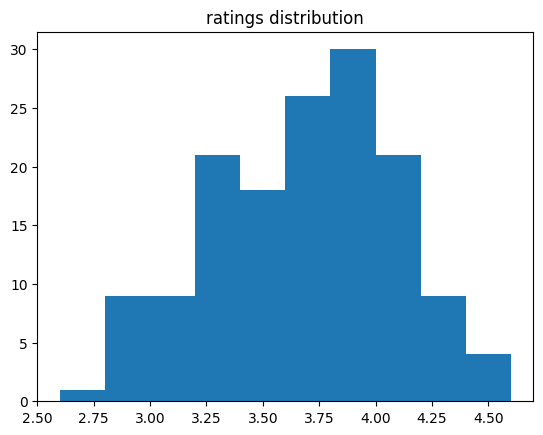

In [13]:
plt.hist(dataframe['rate'], bins=10)
plt.title('ratings distribution')
plt.show()

Conclusion - The majority resturants received ratings from 3.5 to 4

**Q4 Average order spending by couples**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

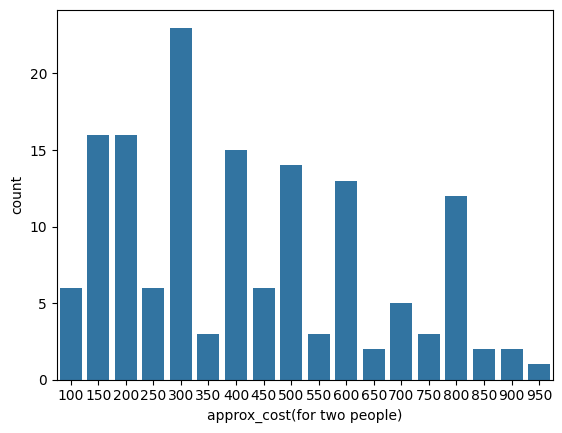

In [14]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion - The majority of the couples preferr resturants with the approximate of 300 rupees

**Q5 Which mode(online or offline) receive maximum rating**

<Axes: xlabel='online_order', ylabel='rate'>

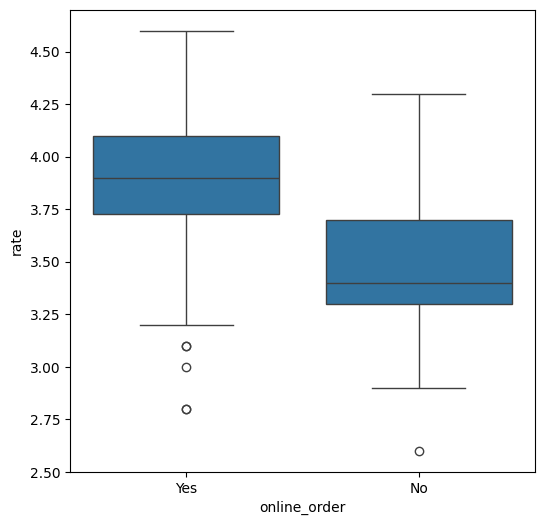

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)

Conclusion - offline order receives lower rating in camparison to online order

**Q6 Which type of resturant received more offline orders**

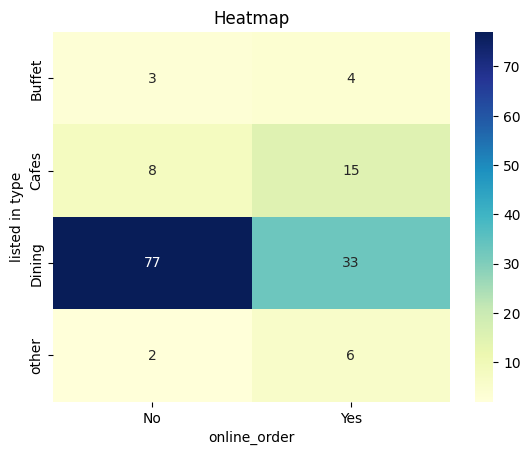

In [17]:
pivot_table=dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("listed in type")
plt.show()

CONCLUSION - Dining resturants primarily acccept offline orders, whereas cafe primarily receive online orders.This suggests that clients preferr to place order in person at resturants, but preferr online ordering at cafes.